# Logistic regression - Multiple classes

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

## Data

<img src="img/iris_flowers.png" width="800">

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

This data set has information on three types of flowers:

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

And four features:

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

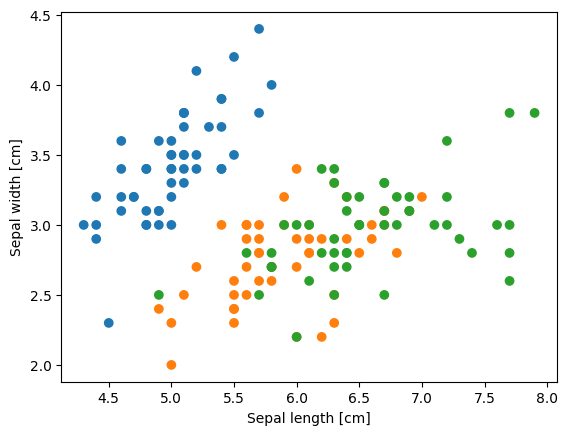

In [6]:
colors = np.array(['tab:blue', 'tab:orange', 'tab:green'])
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color=colors[df.target])
plt.xlabel("Sepal length [cm]")
plt.ylabel("Sepal width [cm]")
plt.show()

## Logistic regression training

In [7]:
# Features matrix and target
X = np.c_[df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], df['petal width (cm)']]
y = df.target

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

It is in general a good idea to first scale the data before feeding it to a LogisticRegression model.

In [8]:
clf = make_pipeline(StandardScaler(),
                    LogisticRegression())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

The classifier did indeed handle three classes:

In [9]:
clf.classes_

array([0, 1, 2])

When several classes are involved, it is better to use the method [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) to display the confusion matrix

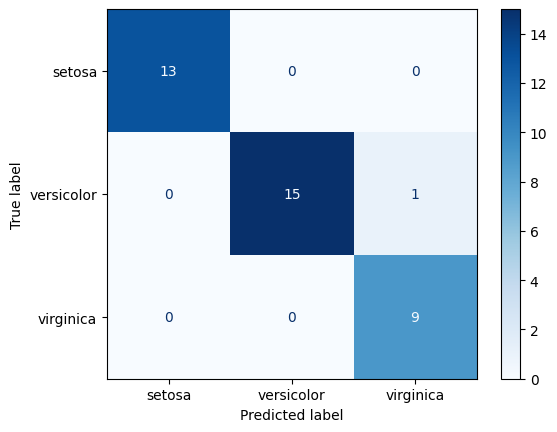

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
)

## Suggested activities

* Repeat the training by changing the features (e.g. use only two features)
* How many samples are classified wrongly?